In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import cv2
from statistics import harmonic_mean

In [ ]:
def is_grey_scale(img, img_path):
  img = Image.open(img_path).convert('RGB')
  w,h = img.size
  for i in range(w):
    for j in range(h):
      r,g,b = img.getpixel((i,j))
      if r != g != b: 
        return False
  return True

def rgbToyuv(r,g,b):
  y= 0.257*r + 0.504*g + 0.098*b +16
  u= -0.148*r - 0.291*g + 0.439*b + 128
  v= 0.439*r - 0.368*g - 0.071*b +128
  return [y,u,v]

def yuvTorgb(y,u,v):
  y-= 16
  u-= 128
  v-= 128
  
  r= 1.164*y + 1.596*v
  g= 1.164*y - 0.392*u - 0.813*v
  b= 1.164*y + 2.017*u
  
  return [r,g,b]

In [ ]:
from statistics import harmonic_mean
def get_histogram(image, bins):
  # array with size of bins, set to zeros
  histogram = np.zeros(bins)
  
  # loop through pixels and sum up counts of pixels
  for pixel in image:
      histogram[pixel] += 1
  
  # return our final result
  return histogram

def harmonicMean(a):
  return harmonic_mean(a)

def cumsum(a):
  a = iter(a)
  b = [next(a)]
  for i in a:
      b.append(b[-1] + i)
  return np.array(b)

def calc_HE(hist):
  cs = cumsum(hist)
  #print("cs len ", len(cs))
  nj = (cs - cs.min()) * 255
  N = cs.max() - cs.min()

# re-normalize the cdf (cumulative distributive function)
  cs = nj / N
  #print(type(cs))
  cs = cs.astype('uint8')
  return cs


In [ ]:
def BHEP(img):
  img= np.asarray(img)
  flat = img.flatten()

  #hist = get_histogram(flat, 256)
  hist= cv2.calcHist([img],[0],None,[256],[0,256])
  hist= hist.flatten()
  hm= harmonic_mean(hist)

  low= []
  high= []
  d_low= {}
  d_high= {}
  
  for i in range(256):
    if hist[i]<=hm:
      low.append(hist[i])
      d_low[i]= 1
    else:
      high.append(hist[i])
      d_high[i]= 1

  low= np.array(low)
  high= np.array(high)

  cs_lower= calc_HE(low)
  cs_higher= calc_HE(high)

  cs_final= [0 for i in range(256)]
  j_low= 0
  j_high= 0
  for i in range(256):
    if i in d_low:
      cs_final[i]= cs_lower[j_low]
      j_low+=1
    else:
      cs_final[i]= cs_higher[j_high]
      j_high+=1
    #cs_final[i]= max(cs_lower[i],cs_higher[i])

  cs_final= np.array(cs_final)
  img_new = cs_final[flat]
  img_new = np.reshape(img_new, img.shape)
  return img_new


In [ ]:
def complete_bhep(img, img_path):
  gray_img= is_grey_scale(img, img_path)
  img_a= np.asarray(img)
  img_arr= np.array([])
  if gray_img:
    img_arr= BHEP(img)

  else:
    #print(1)
    img_cv2= cv2.imread(img_path,1)
    r,g,b= cv2.split(img_cv2)
    y,u,v= rgbToyuv(r,g,b)

    cv2.imwrite('converted.jpg',y)
    img_y_channel= Image.open('converted.jpg')
    img_arr= BHEP(img_y_channel)

    # r,g,b= yuvTorgb(img_new_arr, u, v)
    # r= np.rint(r)
    # g= np.rint(g)
    # b= np.rint(b)
    # img_arr= cv2.merge((r,g,b))
    # cv2.imwrite('neww3.jpg', img_arr)
    #img_arr= new_img

  #result = np.vstack([img_arr,u,v])
  #cv2.imwrite('res.jpg', result)
  cv2.imwrite('res.jpg', img_arr)
  fig = plt.figure()
  fig.set_figheight(15)
  fig.set_figwidth(15)

  fig.add_subplot(1,2,1)
  plt.imshow(img, cmap= 'gray')

  # display the new image
  fig.add_subplot(1,2,2)
  plt.imshow(img_arr, cmap= 'gray')

  plt.show(block=True)


/usr/lib/python3.7/statistics.py:355: RuntimeWarning: divide by zero encountered in true_divide
  T, total, count = _sum(1/x for x in _fail_neg(data, errmsg))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


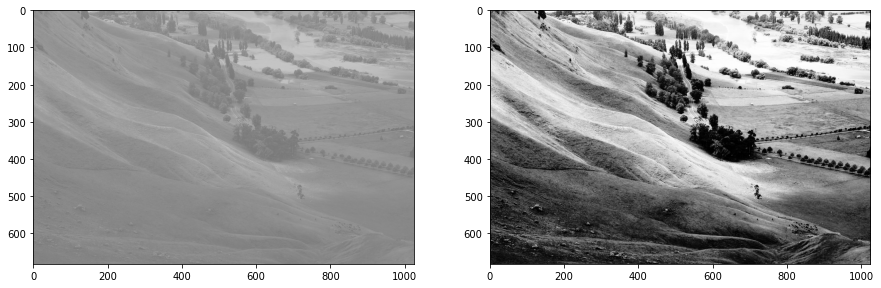

In [ ]:
img_path= "/content/drive/My Drive/Dummy code/Dummy images/wiki.jpg"
image = Image.open(img_path)
complete_bhep(image, img_path)

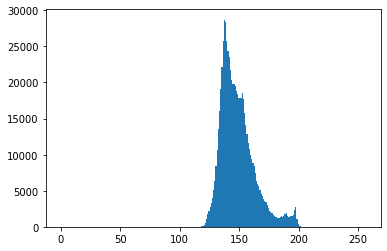

In [ ]:
imgg= cv2.imread(img_path, 0)
plt.hist(imgg.ravel(),256,[0,256]); plt.show()

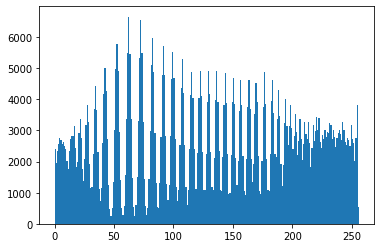

In [ ]:
imgg= cv2.imread('/content/drive/My Drive/Dummy code/BHEPImages/res.jpg', 0)
plt.hist(imgg.ravel(),256,[0,256]); plt.show()